In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])

In [5]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
df.shape

(30, 2)

In [11]:
df.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [12]:
df.duplicated().sum()

0

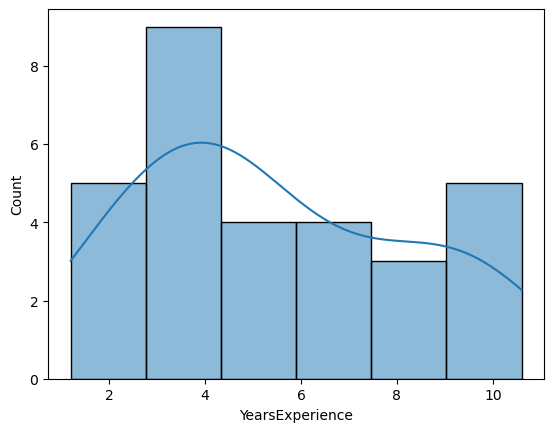

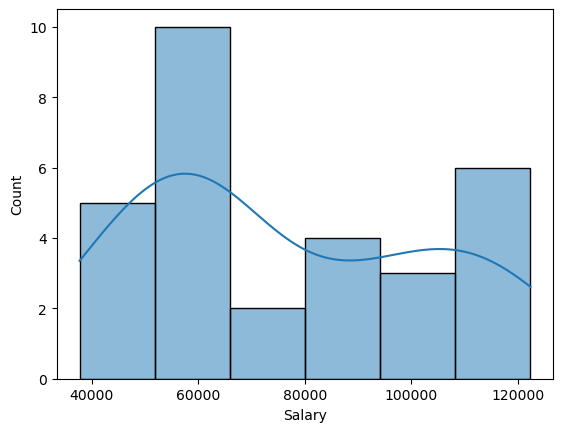

In [14]:
for i in df.columns:
    sns.histplot( x=df[i],kde=True)
    plt.show()

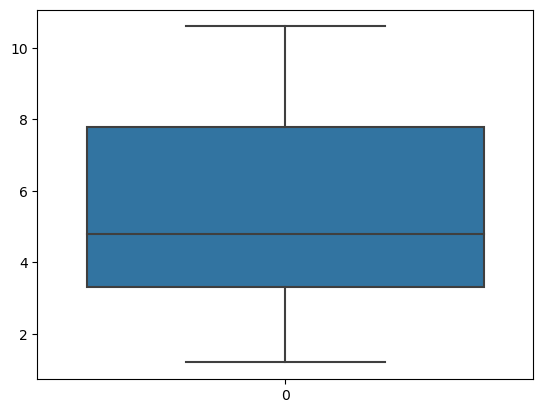

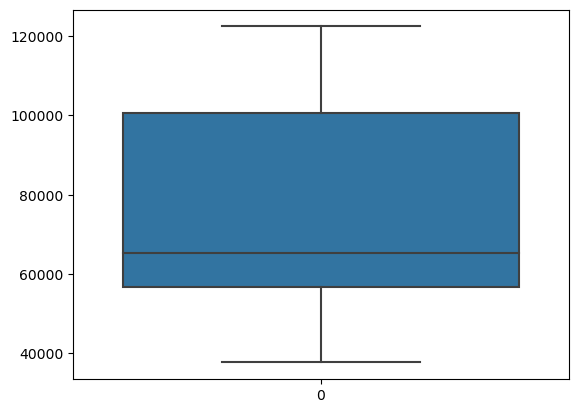

In [17]:
for i in df.columns:
    sns.boxplot(data=df[i])
    plt.show()

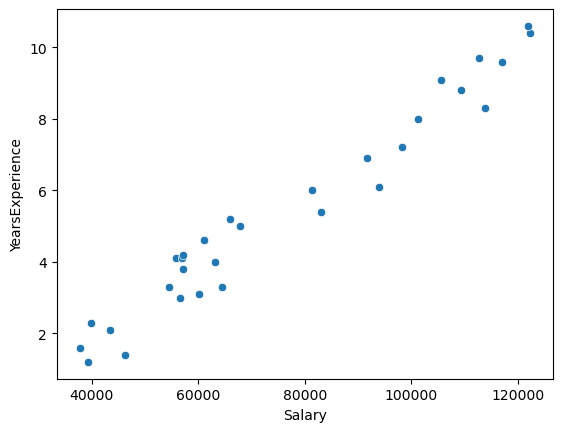

In [18]:
sns.scatterplot(data=df,x='Salary',y='YearsExperience')
plt.show()

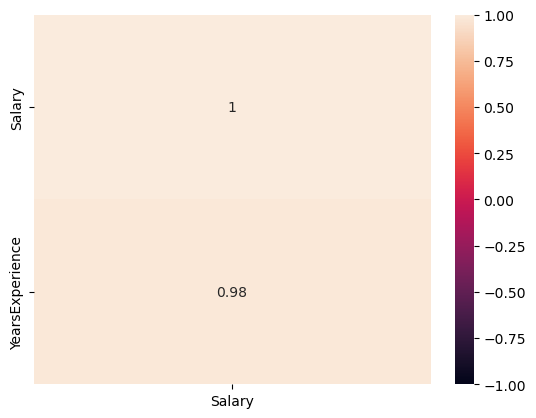

In [25]:
sns.heatmap(df.corr()[['Salary']].sort_values(by='Salary',ascending=False),vmin=-1, vmax=1,annot=True)
plt.show()

### selecting features and targets

In [28]:
x=df.iloc[:,:-1].values

In [29]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [30]:
y=df.iloc[:,-1].values

In [31]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

### feature scaling

#### instalizing standard scaler

In [32]:
sc= StandardScaler()

In [33]:
x=sc.fit_transform(x)

In [34]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

### spliting the data into traning and testing data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### model building

#### instalising model

In [38]:
model=LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=model.predict(x_test)

#### ACCURACY TEST

In [42]:
r2_score(y_test,y_pred)

0.9024461774180498

#### Traning accuracy

In [44]:
model.score(x_train,y_train)

0.9645401573418148

#### MAE

In [45]:
mean_absolute_error(y_test,y_pred)

6286.453830757746

In [46]:
OUTPUT=pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'])

In [47]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,112636.0,115791.210113
1,67939.0,71499.278095
2,113813.0,102597.868661
3,83089.0,75268.804224
4,64446.0,55478.792045


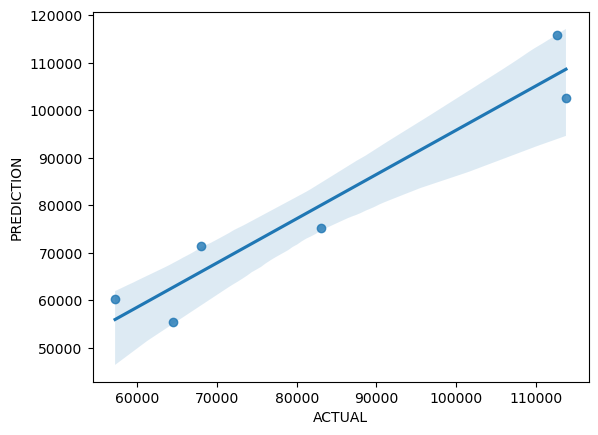

In [49]:
sns.regplot(data=OUTPUT,x='ACTUAL',y='PREDICTION')
plt.show()